## Goal for the analysis:

To understand the buying behaviour of consumers of a wholesale distributor. This will assist the wholesale distributor to understand the categories of products which are popular among specific Channels/consumers who are from certain regions/ cities. In addition to that, by knowing the popularity of those items, the wholesaler can stock those goods to make sure, it is always available for its consumers and also, stock similar or related products which those clients may like. This will further assist the wholesaler generate revenue.


## Task 1: Retrieving and Preparing the Data

In [1]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

# these are imported for visualization with graph
import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sns
# %matplotlib inline

from numpy import percentile
from numpy.random import rand

import sklearn.datasets 
from sklearn.datasets import load_digits

from sklearn import cluster, datasets


In [2]:
# Loading the wholesale customers data-set from local directory

wholesaler_dataset = 'C:/Users/Nushura/s3796107/Wholesale customers Data Set/Wholesale customers data.csv'
wholesaler = pd.read_csv(wholesaler_dataset)

In [3]:
# Viewing the wholesaler dataframe
wholesaler

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
# Checking the datatypes in the dataframe
wholesaler.dtypes

# The result of this code indicates that all the data types of the wholesaler dataste has integer values

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [5]:
# Checking the size of the dataset
# This indicates the number of indexes the dataframe contains which is 440 
# and the number of total attributes the data set has which is 8.
wholesaler.shape

(440, 8)

In [6]:
# Filtering out missing values

# this will drop all rows from the table that has any missing values
# by using dropna() method

wholesaler = wholesaler.dropna()
wholesaler


# After doing this it can be seen that the number of rows did not change at all.
# This means that there are not missing values

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [7]:
wholesaler.drop_duplicates()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [8]:
wholesaler_grouped = wholesaler.groupby(['Channel','Region'])
wholesaler_grouped.mean()

Fresh          Milk       Grocery       Frozen  \
Channel Region                                                          
1       1       12902.254237   3870.203390   4026.135593  3127.322034   
        2       11650.535714   2304.250000   4395.500000  5745.035714   
        3       13878.052133   3486.981043   3886.734597  3656.900474   
2       1        5200.000000  10784.000000  18471.944444  2584.111111   
        2        7289.789474   9190.789474  16326.315789  1540.578947   
        3        9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper   Delicassen  
Channel Region                                 
1       1             950.525424  1197.152542  
        2             482.714286  1105.892857  
        3             786.682464  1518.284360  
2       1            8225.277778  1871.944444  
        2            8410.263158  1239.000000  
        3            6899.238095  1826.209524

## Box-plots to find outliers within the dataset

# Fresh column 

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fresh'>

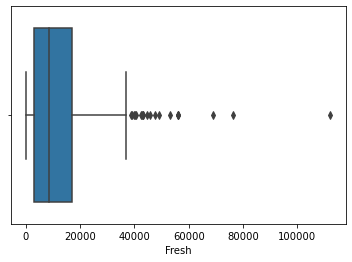

In [9]:
# Fresh
# Initial pre-cleaned box plot of fresh
# using the seaborn library
sns.boxplot(wholesaler['Fresh'])

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


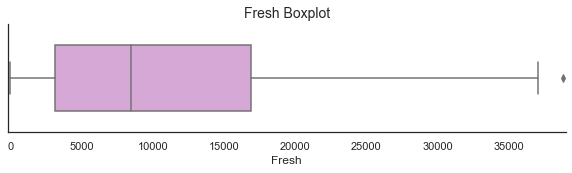

In [10]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of Fresh column
# Setting the color to be plum and width 
sns.boxplot(wholesaler['Fresh'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Fresh Boxplot', fontsize=14)
plt.xlabel('Fresh')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-180, 39000])

plt.show()

In [11]:
# This code is enabling all the values before -180 and after 38000 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_fresh'
new_fresh = wholesaler[wholesaler['Fresh'].between(-180,38000)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


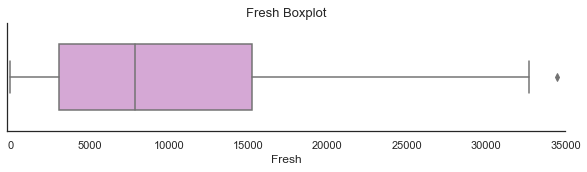

In [12]:
sns.set(style='white')

fig, ax = plt.subplots(figsize=(10, 2))

sns.boxplot(new_fresh['Fresh'], color="plum", width=.6)

plt.title('Fresh Boxplot', fontsize=13)
plt.xlabel('Fresh')

# to remove the border around the box plot graph
sns.despine()

plt.xlim([-180, 35000])

plt.show()

In [13]:
# This code is enabling all the values before -180 and after 34000 to be removed from Fresh column
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_fresh2'
new_fresh2 = wholesaler[wholesaler['Fresh'].between(-180,34000)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


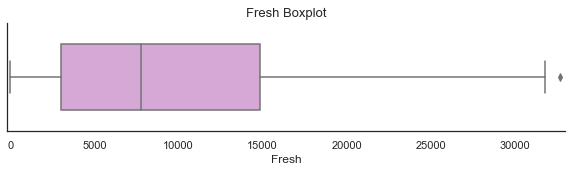

In [14]:
sns.set(style='white')

fig, ax = plt.subplots(figsize=(10, 2))

sns.boxplot(new_fresh2['Fresh'], color="plum", width=.6)

plt.title('Fresh Boxplot', fontsize=13)
plt.xlabel('Fresh')

# to remove the border around the box plot graph
sns.despine()

plt.xlim([-180, 33000])

plt.show()

In [15]:
# This code is enabling all the values before -180 and after 32000 to be removed from fresh column
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_fresh3'
new_fresh3 = wholesaler[wholesaler['Fresh'].between(-180,32000)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


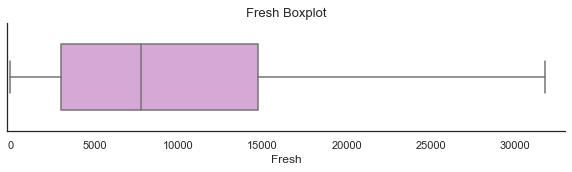

In [16]:
sns.set(style='white')

fig, ax = plt.subplots(figsize=(10, 2))

sns.boxplot(new_fresh3['Fresh'], color="plum", width=.6)

plt.title('Fresh Boxplot', fontsize=13)
plt.xlabel('Fresh')

# to remove the border around the box plot graph
sns.despine()

plt.xlim([-180, 33000])

plt.show()

# Milk Column

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Milk'>

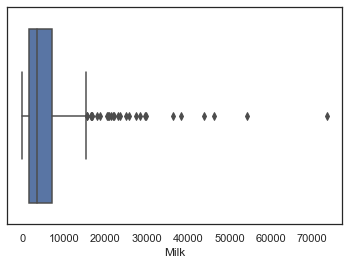

In [17]:
# Initial pre-cleaned box plot of milk
# using the seaborn library
sns.boxplot(wholesaler['Milk'])

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


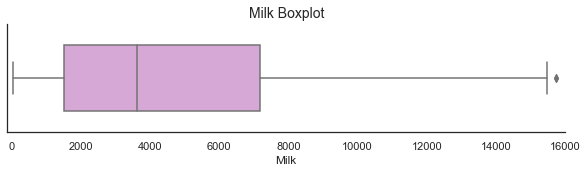

In [18]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of milk column
# Setting the color to be plum and width 
sns.boxplot(wholesaler['Milk'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Milk Boxplot', fontsize=14)
plt.xlabel('Milk')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-120, 16000])

plt.show()

In [19]:
# This code is enabling all the values before -120 and after 15500 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_milk'
new_milk = wholesaler[wholesaler['Milk'].between(-120,15500)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


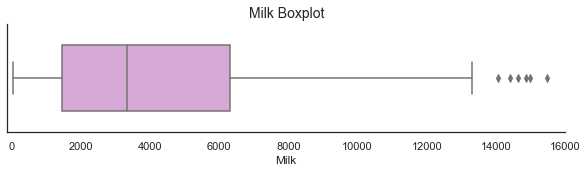

In [20]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of milk column
# Setting the color to be plum and width 
sns.boxplot(new_milk['Milk'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Milk Boxplot', fontsize=14)
plt.xlabel('Milk')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-120, 16000])

plt.show()

In [21]:
# This code is enabling all the values before -120 and after 14000 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_milk2'
new_milk2 = wholesaler[wholesaler['Milk'].between(-120,14000)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


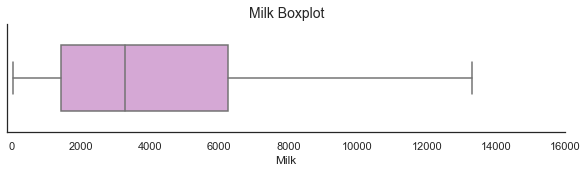

In [22]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of milk column
# Setting the color to be plum and width 
sns.boxplot(new_milk2['Milk'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Milk Boxplot', fontsize=14)
plt.xlabel('Milk')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-120, 16000])

plt.show()

# Grocery

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Grocery'>

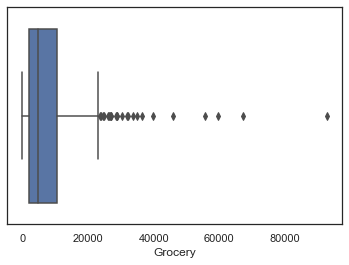

In [23]:
# Initial pre-cleaned box plot of milk
# using the seaborn library
sns.boxplot(wholesaler['Grocery'])

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


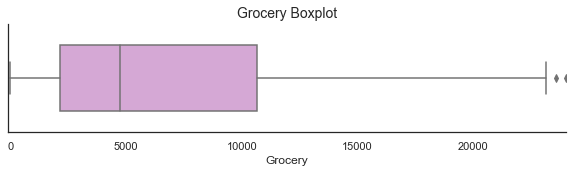

In [24]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of grocery column
# Setting the color to be plum and width 
sns.boxplot(wholesaler['Grocery'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Grocery Boxplot', fontsize=14)
plt.xlabel('Grocery')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 24000])

plt.show()

In [25]:
# This code is enabling all the values before -110 and after 23400 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_grocery'
new_grocery = wholesaler[wholesaler['Grocery'].between(-110,23400)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


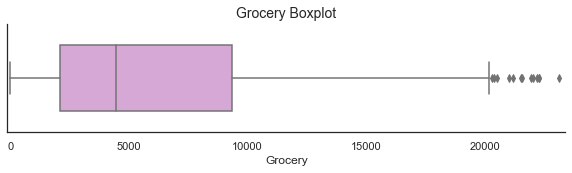

In [26]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of grocery column
# Setting the color to be plum and width 
sns.boxplot(new_grocery['Grocery'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Grocery Boxplot', fontsize=14)
plt.xlabel('Grocery')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-120, 23400])

plt.show()

In [27]:
# This code is enabling all the values before -120 and after 20200 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_grocery2'
new_grocery2 = wholesaler[wholesaler['Grocery'].between(-120,20200)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


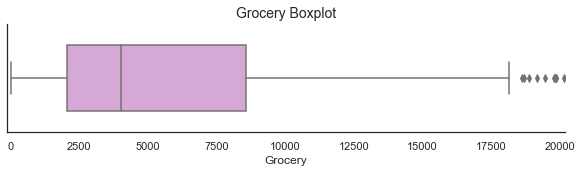

In [28]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of grocery column
# Setting the color to be plum and width 
sns.boxplot(new_grocery2['Grocery'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Grocery Boxplot', fontsize=14)
plt.xlabel('Grocery')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-120, 20200])

plt.show()

In [29]:
# This code is enabling all the values before -120 and after 18500 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_grocery3'
new_grocery3 = wholesaler[wholesaler['Grocery'].between(-120,18500)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


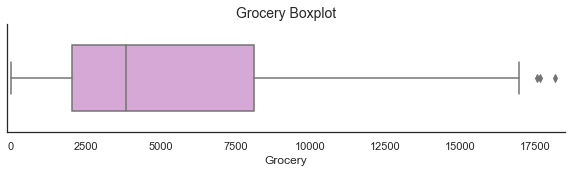

In [30]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of grocery column
# Setting the color to be plum and width 
sns.boxplot(new_grocery3['Grocery'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Grocery Boxplot', fontsize=14)
plt.xlabel('Grocery')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-120, 18500])

plt.show()

In [31]:
# This code is enabling all the values before -120 and after 17000 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_grocery4'
new_grocery4 = wholesaler[wholesaler['Grocery'].between(-120,17000)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


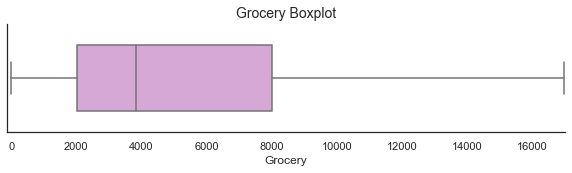

In [32]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of grocery column
# Setting the color to be plum and width 
sns.boxplot(new_grocery4['Grocery'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Grocery Boxplot', fontsize=14)
plt.xlabel('Grocery')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-120, 17000])

plt.show()

# Frozen

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frozen'>

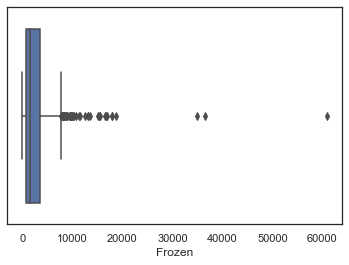

In [33]:
# Initial pre-cleaned box plot of milk
# using the seaborn library
sns.boxplot(wholesaler['Frozen'])

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


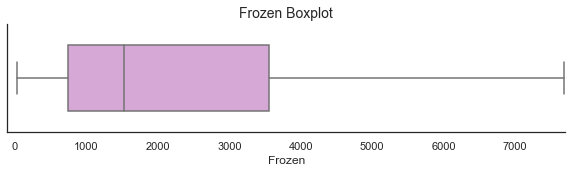

In [34]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of frozen column
# Setting the color to be plum and width 
sns.boxplot(wholesaler['Frozen'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Frozen Boxplot', fontsize=14)
plt.xlabel('Frozen')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 7700])

plt.show()

In [35]:
# This code is enabling all the values before -110 and after 7700 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_frozen'
new_frozen = wholesaler[wholesaler['Frozen'].between(-110,7700)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


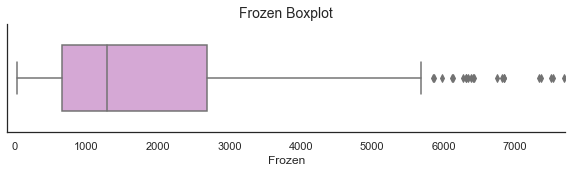

In [36]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of frozen column
# Setting the color to be plum and width 
sns.boxplot(new_frozen['Frozen'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Frozen Boxplot', fontsize=14)
plt.xlabel('Frozen')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 7700])

plt.show()

In [37]:
# This code is enabling all the values before -110 and after 5820 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_frozen1'
new_frozen1 = wholesaler[wholesaler['Frozen'].between(-110,5820)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


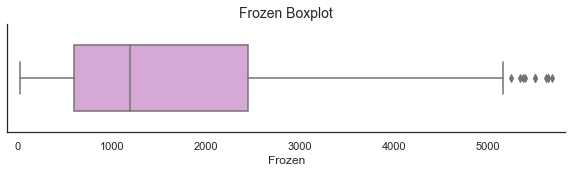

In [38]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of frozen column
# Setting the color to be plum and width 
sns.boxplot(new_frozen1['Frozen'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Frozen Boxplot', fontsize=14)
plt.xlabel('Frozen')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 5820])

plt.show()

In [39]:
# This code is enabling all the values before -110 and after 5200 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_frozen2'
new_frozen2 = wholesaler[wholesaler['Frozen'].between(-110,5200)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


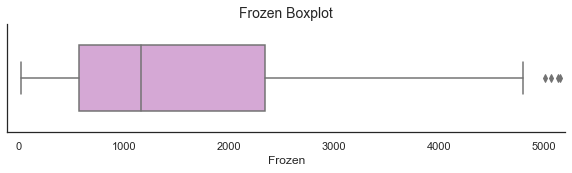

In [40]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of frozen column
# Setting the color to be plum and width 
sns.boxplot(new_frozen2['Frozen'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Frozen Boxplot', fontsize=14)
plt.xlabel('Frozen')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 5200])

plt.show()

In [41]:
# This code is enabling all the values before -110 and after 4900 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_frozen3'
new_frozen3 = wholesaler[wholesaler['Frozen'].between(-110,4900)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


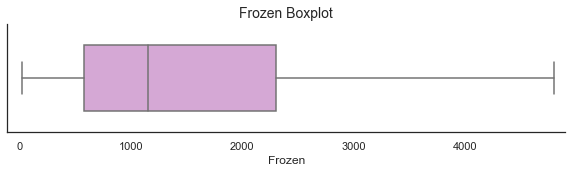

In [42]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of frozen column
# Setting the color to be plum and width 
sns.boxplot(new_frozen3['Frozen'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Frozen Boxplot', fontsize=14)
plt.xlabel('Frozen')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 4900])

plt.show()

# Detergents_Paper

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Detergents_Paper'>

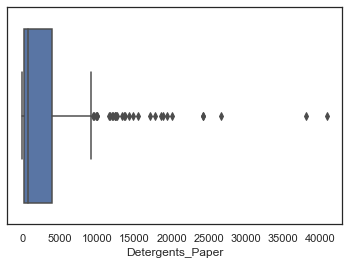

In [43]:
# Initial pre-cleaned box plot of Detergents_Paper
# using the seaborn library
sns.boxplot(wholesaler['Detergents_Paper'])

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


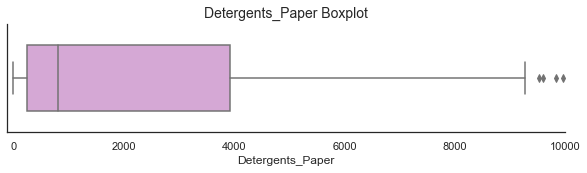

In [44]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of Detergents_Paper column
# Setting the color to be plum and width 
sns.boxplot(wholesaler['Detergents_Paper'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Detergents_Paper Boxplot', fontsize=14)
plt.xlabel('Detergents_Paper')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 10000])

plt.show()

In [45]:
# This code is enabling all the values before -110 and after 9400 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_Detergents_Paper'
new_Detergents_Paper = wholesaler[wholesaler['Detergents_Paper'].between(-110,9400)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


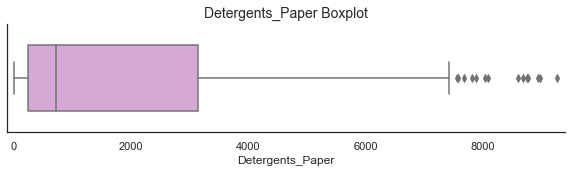

In [46]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of Detergents_Paper column
# Setting the color to be plum and width 
sns.boxplot(new_Detergents_Paper['Detergents_Paper'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Detergents_Paper Boxplot', fontsize=14)
plt.xlabel('Detergents_Paper')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 9400])

plt.show()

In [47]:
# This code is enabling all the values before -110 and after 7500 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_Detergents_Paper2'
new_Detergents_Paper2 = wholesaler[wholesaler['Detergents_Paper'].between(-110,7500)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


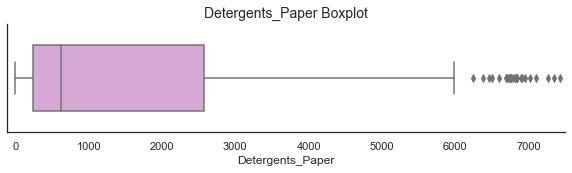

In [48]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of Detergents_Paper column
# Setting the color to be plum and width 
sns.boxplot(new_Detergents_Paper2['Detergents_Paper'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Detergents_Paper Boxplot', fontsize=14)
plt.xlabel('Detergents_Paper')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 7500])

plt.show()

In [49]:
# This code is enabling all the values before -110 and after 6000 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_Detergents_Paper3'
new_Detergents_Paper3 = wholesaler[wholesaler['Detergents_Paper'].between(-110,6000)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


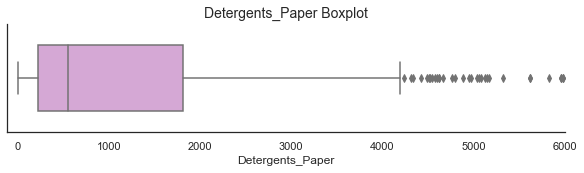

In [50]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of Detergents_Paper column
# Setting the color to be plum and width 
sns.boxplot(new_Detergents_Paper3['Detergents_Paper'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Detergents_Paper Boxplot', fontsize=14)
plt.xlabel('Detergents_Paper')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 6000])

plt.show()

In [51]:
# This code is enabling all the values before -110 and after 4200 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_Detergents_Paper4'
new_Detergents_Paper4 = wholesaler[wholesaler['Detergents_Paper'].between(-110,4200)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


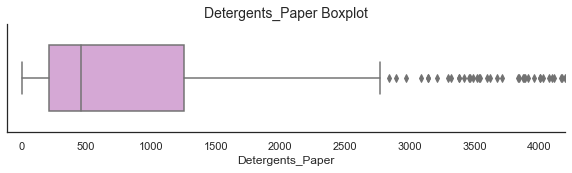

In [52]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of Detergents_Paper column
# Setting the color to be plum and width 
sns.boxplot(new_Detergents_Paper4['Detergents_Paper'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Detergents_Paper Boxplot', fontsize=14)
plt.xlabel('Detergents_Paper')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 4200])

plt.show()

In [53]:
# This code is enabling all the values before -110 and after 2800 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_Detergents_Paper5'
new_Detergents_Paper5 = wholesaler[wholesaler['Detergents_Paper'].between(-110,2800)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


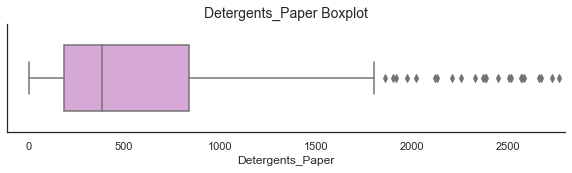

In [54]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of Detergents_Paper column
# Setting the color to be plum and width 
sns.boxplot(new_Detergents_Paper5['Detergents_Paper'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Detergents_Paper Boxplot', fontsize=14)
plt.xlabel('Detergents_Paper')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 2800])

plt.show()

In [55]:
# This code is enabling all the values before -110 and after 1850 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_Detergents_Paper6'
new_Detergents_Paper6 = wholesaler[wholesaler['Detergents_Paper'].between(-110,1850)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


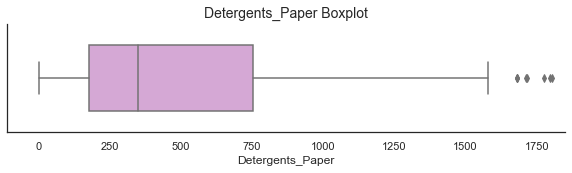

In [56]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of Detergents_Paper column
# Setting the color to be plum and width 
sns.boxplot(new_Detergents_Paper6['Detergents_Paper'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Detergents_Paper Boxplot', fontsize=14)
plt.xlabel('Detergents_Paper')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 1850])

plt.show()

In [57]:
# This code is enabling all the values before -110 and after 1600 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_Detergents_Paper7'
new_Detergents_Paper7 = wholesaler[wholesaler['Detergents_Paper'].between(-110,1600)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


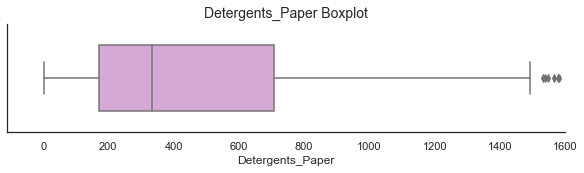

In [58]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of Detergents_Paper column
# Setting the color to be plum and width 
sns.boxplot(new_Detergents_Paper7['Detergents_Paper'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Detergents_Paper Boxplot', fontsize=14)
plt.xlabel('Detergents_Paper')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 1600])

plt.show()

In [59]:
# This code is enabling all the values before -110 and after 1500 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_Detergents_Paper8'
new_Detergents_Paper8 = wholesaler[wholesaler['Detergents_Paper'].between(-110,1500)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


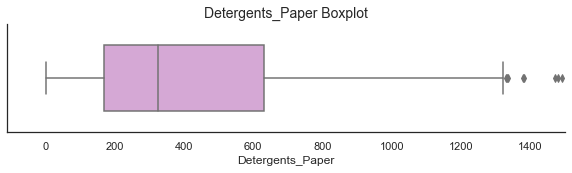

In [60]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of Detergents_Paper column
# Setting the color to be plum and width 
sns.boxplot(new_Detergents_Paper8['Detergents_Paper'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Detergents_Paper Boxplot', fontsize=14)
plt.xlabel('Detergents_Paper')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 1500])

plt.show()

In [61]:
# This code is enabling all the values before -110 and after 1322 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_Detergents_Paper9'
new_Detergents_Paper9 = wholesaler[wholesaler['Detergents_Paper'].between(-110,1322)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


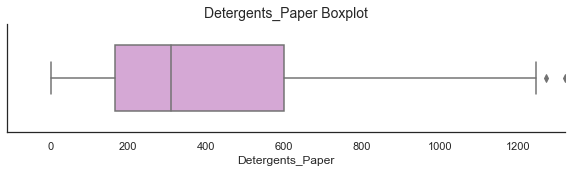

In [62]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of Detergents_Paper column
# Setting the color to be plum and width 
sns.boxplot(new_Detergents_Paper9['Detergents_Paper'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Detergents_Paper Boxplot', fontsize=14)
plt.xlabel('Detergents_Paper')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 1322])

plt.show()

In [63]:
# This code is enabling all the values before -110 and after 1250 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_Detergents_Paper10'
new_Detergents_Paper10 = wholesaler[wholesaler['Detergents_Paper'].between(-110,1250)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


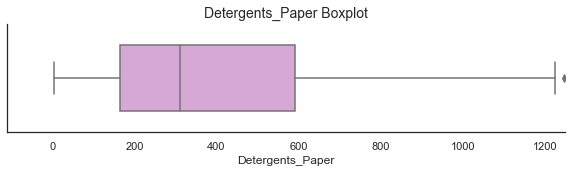

In [64]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of Detergents_Paper column
# Setting the color to be plum and width 
sns.boxplot(new_Detergents_Paper10['Detergents_Paper'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Detergents_Paper Boxplot', fontsize=14)
plt.xlabel('Detergents_Paper')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 1250])

plt.show()

In [65]:
# This code is enabling all the values before -110 and after 1240 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_Detergents_Paper11'
new_Detergents_Paper11 = wholesaler[wholesaler['Detergents_Paper'].between(-110,1240)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


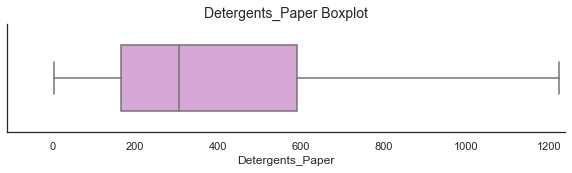

In [66]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of Detergents_Paper column
# Setting the color to be plum and width 
sns.boxplot(new_Detergents_Paper11['Detergents_Paper'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Detergents_Paper Boxplot', fontsize=14)
plt.xlabel('Detergents_Paper')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 1240])

plt.show()

# Delicassen

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delicassen'>

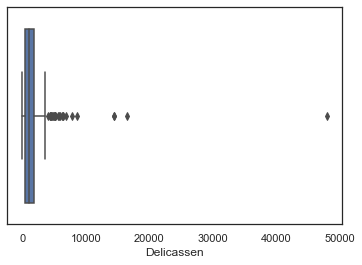

In [67]:
# Initial pre-cleaned box plot of Delicassen
# using the seaborn library
sns.boxplot(wholesaler['Delicassen'])

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


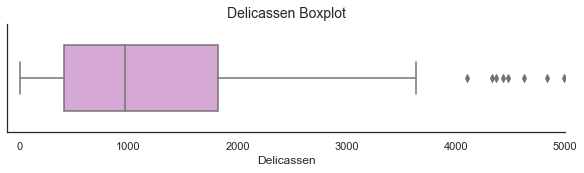

In [68]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of Delicassen column
# Setting the color to be plum and width 
sns.boxplot(wholesaler['Delicassen'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Delicassen Boxplot', fontsize=14)
plt.xlabel('Delicassen')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 5000])

plt.show()

In [69]:
# This code is enabling all the values before -110 and after 4000 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_Delicassen'
new_Delicassen = wholesaler[wholesaler['Delicassen'].between(-110,4000)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


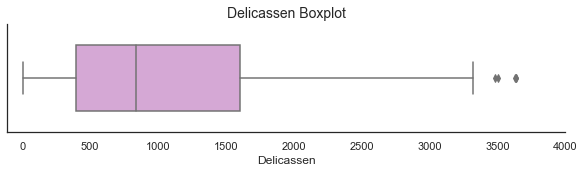

In [70]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of Delicassen column
# Setting the color to be plum and width 
sns.boxplot(new_Delicassen['Delicassen'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Delicassen Boxplot', fontsize=14)
plt.xlabel('Delicassen')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 4000])

plt.show()

In [71]:
# This code is enabling all the values before -110 and after 3400 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_Delicassen2'
new_Delicassen2 = wholesaler[wholesaler['Delicassen'].between(-110,3400)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


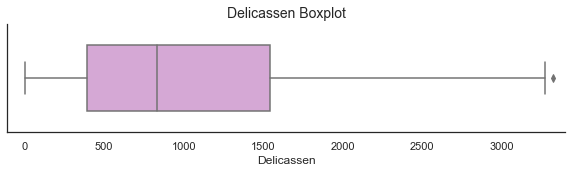

In [72]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of Delicassen column
# Setting the color to be plum and width 
sns.boxplot(new_Delicassen2['Delicassen'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Delicassen Boxplot', fontsize=14)
plt.xlabel('Delicassen')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 3400])

plt.show()

In [73]:
# This code is enabling all the values before -110 and after 3300 to be removed
# As those values are acting as outliers
# Thus, after removing those values, the new dataset is being stored in 'new_Delicassen3'
new_Delicassen3 = wholesaler[wholesaler['Delicassen'].between(-110,3300)]

C:\Users\Nushura\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


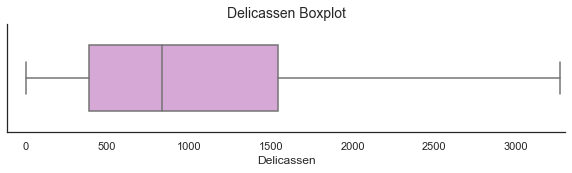

In [74]:
# Styling
sns.set(style='white')

# Setting figure size
fig, ax = plt.subplots(figsize=(10, 2))

# Boxplot of Delicassen column
# Setting the color to be plum and width 
sns.boxplot(new_Delicassen3['Delicassen'], color="plum", width=.6)

# Labeling of title and x-axis
plt.title('Delicassen Boxplot', fontsize=14)
plt.xlabel('Delicassen')

# This is to remove the borders around the boxplot
sns.despine()

# Setting x limit
plt.xlim([-110, 3300])

plt.show()

# Task 2.1: Data Exploration of each column

### Details of the boxplots done earlier to further explore the columns called Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen

In [75]:
# Overall summary of the whole dataframe 
new_Delicassen3.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,1.312039,2.542998,11348.941032,5092.633907,7446.877150,2737.017199,2746.036855,1056.034398
std,0.463896,0.773638,11350.124650,6205.684870,9093.010555,3619.453315,4638.273986,820.341190
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3077.000000,1468.000000,2089.500000,667.500000,245.000000,387.000000
50%,1.000000,3.000000,8257.000000,3373.000000,4563.000000,1439.000000,778.000000,834.000000
75%,2.000000,3.000000,15999.000000,6744.500000,9806.500000,3247.000000,3774.500000,1542.500000
max,2.000000,3.000000,76237.000000,73498.000000,92780.000000,35009.000000,40827.000000,3271.000000


In [76]:
# Summary of the Fresh column distribution
x = new_Delicassen3['Fresh']
x.describe()

count      407.000000
mean     11348.941032
std      11350.124650
min          3.000000
25%       3077.000000
50%       8257.000000
75%      15999.000000
max      76237.000000
Name: Fresh, dtype: float64

In [77]:
# Summary of the Milk column distribution
x = new_Delicassen3['Milk']
x.describe()

count      407.000000
mean      5092.633907
std       6205.684870
min         55.000000
25%       1468.000000
50%       3373.000000
75%       6744.500000
max      73498.000000
Name: Milk, dtype: float64

In [78]:
# Summary of the Grocery column distribution
x = new_Delicassen3['Grocery']
x.describe()

count      407.000000
mean      7446.877150
std       9093.010555
min          3.000000
25%       2089.500000
50%       4563.000000
75%       9806.500000
max      92780.000000
Name: Grocery, dtype: float64

In [79]:
# Summary of the Frozen column distribution
x = new_Delicassen3['Frozen']
x.describe()

count      407.000000
mean      2737.017199
std       3619.453315
min         25.000000
25%        667.500000
50%       1439.000000
75%       3247.000000
max      35009.000000
Name: Frozen, dtype: float64

In [80]:
# Summary of the Detergents_Paper column distribution
x = new_Delicassen3['Detergents_Paper']
x.describe()

count      407.000000
mean      2746.036855
std       4638.273986
min          3.000000
25%        245.000000
50%        778.000000
75%       3774.500000
max      40827.000000
Name: Detergents_Paper, dtype: float64

In [81]:
# Summary of the Delicassen column distribution
x = new_Delicassen3['Delicassen']
x.describe()

count     407.000000
mean     1056.034398
std       820.341190
min         3.000000
25%       387.000000
50%       834.000000
75%      1542.500000
max      3271.000000
Name: Delicassen, dtype: float64

### Pie-Charts for exploring Channels and Regions

In [82]:
x= new_Delicassen3.Channel
x.value_counts()

1    280
2    127
Name: Channel, dtype: int64

In [83]:
Channel_counts = x.value_counts()

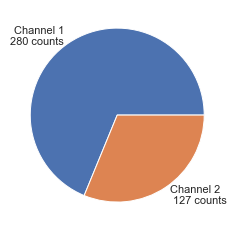

In [84]:
pieChart_Channel = Channel_counts

df_label = ["Channel 1\n 280 counts", "Channel 2\n 127 counts"]

# plotting and labeling the pie chart of Channel
plt.pie(pieChart_Channel, labels=df_label)
plt.show()

In [85]:
y= new_Delicassen3.Region
y.value_counts()

3    292
1     71
2     44
Name: Region, dtype: int64

In [86]:
y= new_Delicassen3.Region
Region_counts = y.value_counts()

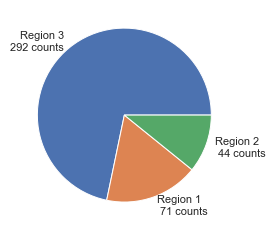

In [87]:
pieChart_Region = Region_counts

df_label = ["Region 3\n 292 counts", "Region 1\n 71 counts", "Region 2\n 44 counts"]

# plotting and labeling the pie chart of Region
plt.pie(pieChart_Region, labels=df_label)
plt.show()

# Task 2.2: Data Exploration 

#### Bar Chart for exploring relationship between Channel and all the other 6 wholesale products

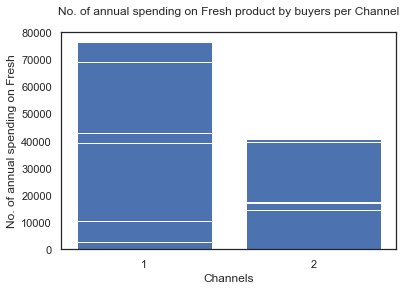

In [88]:
# Determining what feature will be considered for the x-axis 
# head() method is enabling the graph to consider only the 1st 10 values
x = new_Delicassen3.Channel
x

# Determining what feature will be considered for the y-axis
y = new_Delicassen3.Fresh
y

# Setting x ticks
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.bar(x, y)

# Labeling the bar chart
plt.title("No. of annual spending on Fresh product by buyers per Channel\n")
plt.xlabel("Channels")
plt.ylabel("No. of annual spending on Fresh")
plt.show()

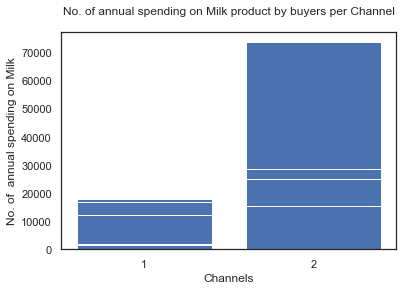

In [89]:
# Determining what feature will be considered for the x-axis 
# head() method is enabling the graph to consider only the 1st 10 values
x = new_Delicassen3.Channel
x

# Determining what feature will be considered for the y-axis
y = new_Delicassen3.Milk
y

# Setting x ticks
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.bar(x, y)

# Labeling the bar chart
plt.title("No. of annual spending on Milk product by buyers per Channel\n")
plt.xlabel("Channels")
plt.ylabel("No. of  annual spending on Milk")
plt.show()

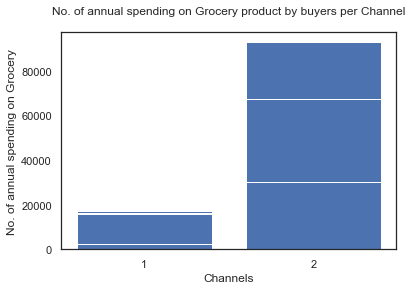

In [90]:
# Determining what feature will be considered for the x-axis 
# head() method is enabling the graph to consider only the 1st 10 values
x = new_Delicassen3.Channel
x

# Determining what feature will be considered for the y-axis
y = new_Delicassen3.Grocery
y

# Setting x ticks
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.bar(x, y)

# Labeling the bar chart
plt.title("No. of annual spending on Grocery product by buyers per Channel\n")
plt.xlabel("Channels")
plt.ylabel("No. of annual spending on Grocery")
plt.show()

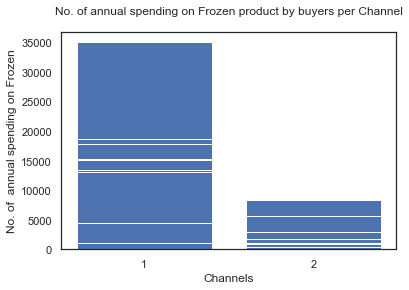

In [91]:
# Determining what feature will be considered for the x-axis 
# head() method is enabling the graph to consider only the 1st 10 values
x = new_Delicassen3.Channel
x

# Determining what feature will be considered for the y-axis
y = new_Delicassen3.Frozen
y

# Setting x ticks
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.bar(x, y)

# Labeling the bar chart
plt.title("No. of annual spending on Frozen product by buyers per Channel\n")
plt.xlabel("Channels")
plt.ylabel("No. of  annual spending on Frozen")
plt.show()

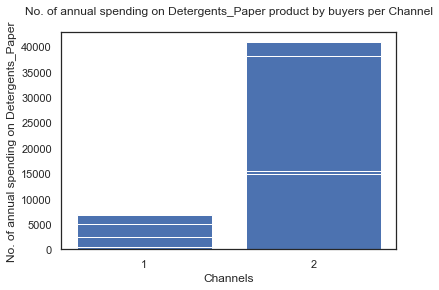

In [92]:
# Determining what feature will be considered for the x-axis 
# head() method is enabling the graph to consider only the 1st 10 values
x = new_Delicassen3.Channel
x

# Determining what feature will be considered for the y-axis
y = new_Delicassen3.Detergents_Paper
y

# Setting x ticks
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.bar(x, y)

# Labeling the bar chart
plt.title("No. of annual spending on Detergents_Paper product by buyers per Channel\n")
plt.xlabel("Channels")
plt.ylabel("No. of annual spending on Detergents_Paper")
plt.show()

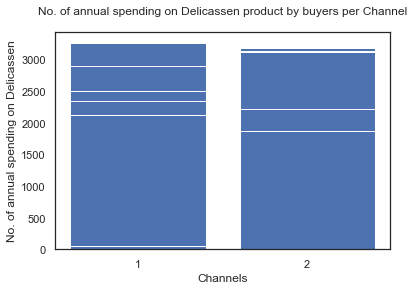

In [93]:
# Determining what feature will be considered for the x-axis 
# head() method is enabling the graph to consider only the 1st 10 values
x = new_Delicassen3.Channel
x

# Determining what feature will be considered for the y-axis
y = new_Delicassen3.Delicassen
y

# Setting x ticks
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.bar(x, y)

# Labeling the bar chart
plt.title("No. of annual spending on Delicassen product by buyers per Channel\n")
plt.xlabel("Channels")
plt.ylabel("No. of annual spending on Delicassen")
plt.show()

#### Bar Chart for exploring relationship between Region and all the other 6 wholesale products

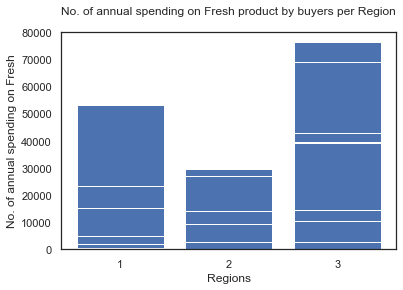

In [94]:
# Determining what feature will be considered for the x-axis 
# head() method is enabling the graph to consider only the 1st 10 values
x = new_Delicassen3.Region
x

# Determining what feature will be considered for the y-axis
y = new_Delicassen3.Fresh
y

# Setting x ticks
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.bar(x, y)

# Labeling the bar chart
plt.title("No. of annual spending on Fresh product by buyers per Region\n")
plt.xlabel("Regions")
plt.ylabel("No. of annual spending on Fresh")
plt.show()

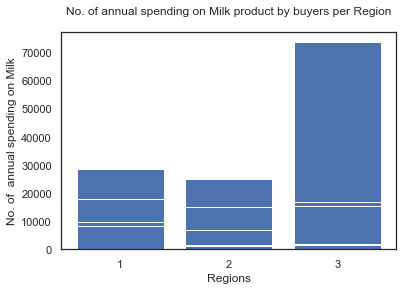

In [95]:
# Determining what feature will be considered for the x-axis 
# head() method is enabling the graph to consider only the 1st 10 values
x = new_Delicassen3.Region
x

# Determining what feature will be considered for the y-axis
y = new_Delicassen3.Milk
y

# Setting x ticks
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.bar(x, y)

# Labeling the bar chart
plt.title("No. of annual spending on Milk product by buyers per Region\n")
plt.xlabel("Regions")
plt.ylabel("No. of  annual spending on Milk")
plt.show()

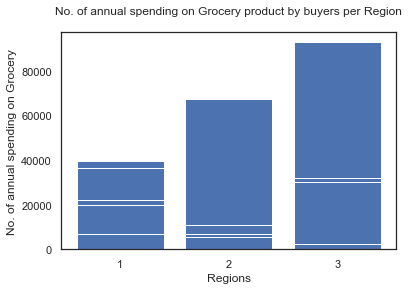

In [96]:
# Determining what feature will be considered for the x-axis 
# head() method is enabling the graph to consider only the 1st 10 values
x = new_Delicassen3.Region
x

# Determining what feature will be considered for the y-axis
y = new_Delicassen3.Grocery
y

# Setting x ticks
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.bar(x, y)

# Labeling the bar chart
plt.title("No. of annual spending on Grocery product by buyers per Region\n")
plt.xlabel("Regions")
plt.ylabel("No. of annual spending on Grocery")
plt.show()

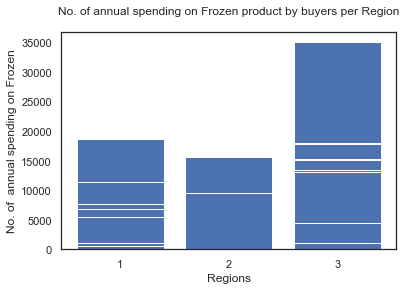

In [97]:
# Determining what feature will be considered for the x-axis 
# head() method is enabling the graph to consider only the 1st 10 values
x = new_Delicassen3.Region
x

# Determining what feature will be considered for the y-axis
y = new_Delicassen3.Frozen
y

# Setting x ticks
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.bar(x, y)

# Labeling the bar chart
plt.title("No. of annual spending on Frozen product by buyers per Region\n")
plt.xlabel("Regions")
plt.ylabel("No. of  annual spending on Frozen")
plt.show()

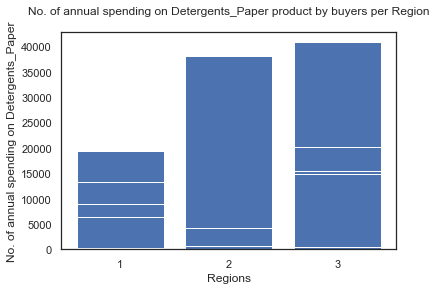

In [98]:
# Determining what feature will be considered for the x-axis 
# head() method is enabling the graph to consider only the 1st 10 values
x = new_Delicassen3.Region
x

# Determining what feature will be considered for the y-axis
y = new_Delicassen3.Detergents_Paper
y

# Setting x ticks
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.bar(x, y)

# Labeling the bar chart
plt.title("No. of annual spending on Detergents_Paper product by buyers per Region\n")
plt.xlabel("Regions")
plt.ylabel("No. of annual spending on Detergents_Paper")
plt.show()

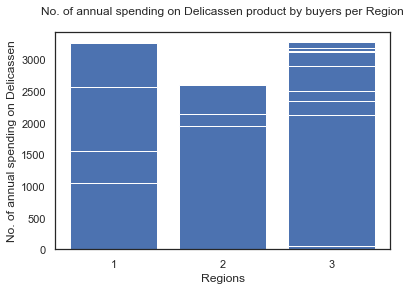

In [99]:
# Determining what feature will be considered for the x-axis 
# head() method is enabling the graph to consider only the 1st 10 values
x = new_Delicassen3.Region
x

# Determining what feature will be considered for the y-axis
y = new_Delicassen3.Delicassen
y

# Setting x ticks
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.bar(x, y)

# Labeling the bar chart
plt.title("No. of annual spending on Delicassen product by buyers per Region\n")
plt.xlabel("Regions")
plt.ylabel("No. of annual spending on Delicassen")
plt.show()

#### Scatter-Plots for exploring relationship between numerical column

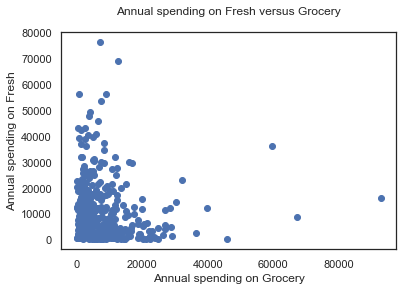

In [100]:
# Scatter plot for annual spending on Fresh versus Grocery
x = new_Delicassen3.Grocery
y = new_Delicassen3.Fresh

plt.scatter(x, y)

# Labeling the scatter plot
plt.title("Annual spending on Fresh versus Grocery\n")
plt.xlabel("Annual spending on Grocery")
plt.ylabel("Annual spending on Fresh")

plt.show()

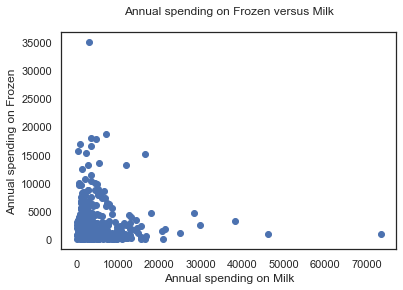

In [101]:
# Scatter plot for annual spending on Frozen versus Milk
x = new_Delicassen3.Milk
y = new_Delicassen3.Frozen

plt.scatter(x, y)

# Labeling the scatter plot
plt.title("Annual spending on Frozen versus Milk\n")
plt.xlabel("Annual spending on Milk")
plt.ylabel("Annual spending on Frozen")

plt.show()

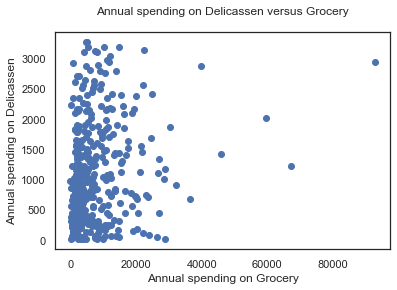

In [102]:
# Scatter plot for annual spending on Delicassen versus Grocery
x = new_Delicassen3.Grocery
y = new_Delicassen3.Delicassen

plt.scatter(x, y)

# Labeling the scatter plot
plt.title("Annual spending on Delicassen versus Grocery\n")
plt.xlabel("Annual spending on Grocery")
plt.ylabel("Annual spending on Delicassen")

plt.show()

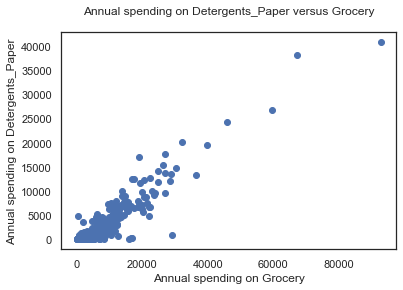

In [103]:
# Scatter plot for annual spending on Detergents_Paper versus Grocery
x = new_Delicassen3.Grocery
y = new_Delicassen3.Detergents_Paper

plt.scatter(x, y)

# Labeling the scatter plot
plt.title("Annual spending on Detergents_Paper versus Grocery\n")
plt.xlabel("Annual spending on Grocery")
plt.ylabel("Annual spending on Detergents_Paper")

plt.show()

## Task 3: Data Modelling

### KMeans clustering

In [104]:
import sklearn.datasets 

In [105]:
cleaned_df = new_Delicassen3.to_csv('cleaned_df.csv', index=False)

In [106]:
cleaned_data = 'C:/Users/Nushura/s3796107/cleaned_df.csv'
dataset = pd.read_csv(cleaned_data)

In [107]:
type(dataset)

pandas.core.frame.DataFrame

In [108]:
dataset.shape

(407, 8)

In [109]:
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,1,3,13265,1196,4221,6404,507,1788
3,2,3,9413,8259,5126,666,1795,1451
4,2,3,12126,3199,6975,480,3140,545


In [110]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           407 non-null    int64
 1   Region            407 non-null    int64
 2   Fresh             407 non-null    int64
 3   Milk              407 non-null    int64
 4   Grocery           407 non-null    int64
 5   Frozen            407 non-null    int64
 6   Detergents_Paper  407 non-null    int64
 7   Delicassen        407 non-null    int64
dtypes: int64(8)
memory usage: 25.6 KB


In [111]:
X = pd.DataFrame(dataset)
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,1,3,13265,1196,4221,6404,507,1788
3,2,3,9413,8259,5126,666,1795,1451
4,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
402,1,3,29703,12051,16027,13135,182,2204
403,1,3,39228,1431,764,4510,93,2346
404,2,3,14531,15488,30243,437,14841,1867
405,1,3,10290,1981,2232,1038,168,2125


In [112]:
# Here clustering is done on the whole dataste
# n_cluster is refering to the number of clusters 
# so as there are 8 attributes, the number of cluster is going to be 8
model = cluster.KMeans(n_clusters = 8, random_state=14)

In [113]:
# Fitting the model with the dataset
fit = model.fit(X)

In [114]:
# This created a new column on the dataframe
# This column will contain the clustering results
# For the cluster column values, it is not certain what those values represent
X["cluster"] = fit.predict(X)

In [115]:
# this created a new column on the dataframe named c
X["c"] = "count"
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,c
0,2,3,12669,9656,7561,214,2674,1338,0,count
1,2,3,7057,9810,9568,1762,3293,1776,3,count
2,1,3,13265,1196,4221,6404,507,1788,0,count
3,2,3,9413,8259,5126,666,1795,1451,0,count
4,2,3,12126,3199,6975,480,3140,545,0,count
...,...,...,...,...,...,...,...,...,...,...
402,1,3,29703,12051,16027,13135,182,2204,5,count
403,1,3,39228,1431,764,4510,93,2346,2,count
404,2,3,14531,15488,30243,437,14841,1867,1,count
405,1,3,10290,1981,2232,1038,168,2125,0,count


In [116]:
# cluster is the clustering results
# Region is acting as target here
# c is the count of Region per cluster
clustering_result = X[["cluster", "Region", "c"]].groupby(["cluster", "Region"]).agg("count")

In [117]:
clustering_result

c
cluster Region    
0       1       16
        2       13
        3       78
1       1        7
        2        7
        3       19
2       1        2
        3       17
3       1       10
        2        5
        3       58
4       2        1
        3        2
5       1        8
        2        5
        3       30
6       3        1
7       1       28
        2       13
        3       87

### DBSCAN Clustering

In [118]:
dataset.shape

(407, 10)

In [119]:
dataset = dataset.iloc[:, 0:7].values

In [120]:
dataset

array([[    2,     3, 12669, ...,  7561,   214,  2674],
       [    2,     3,  7057, ...,  9568,  1762,  3293],
       [    1,     3, 13265, ...,  4221,  6404,   507],
       ...,
       [    2,     3, 14531, ..., 30243,   437, 14841],
       [    1,     3, 10290, ...,  2232,  1038,   168],
       [    1,     3,  2787, ...,  2510,    65,   477]], dtype=int64)

In [121]:
plt.scatter(dataset[:,0], dataset[:,1], dataset[:,2], dataset[:,3], dataset[:,4], dataset[:,5],dataset[:,6], s=5, c="black" )

TypeError: scatter() got multiple values for argument 's'